In [1]:
from pathlib import Path
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

params_path = Path.home() / "Desktop" / "rbi-lite" / "data" / "params.json"
with open(params_path, "r", encoding="utf-8") as f:
    params = json.load(f)

t0 = float(params["t0_mm"])
t_min = float(params["t_min_mm"])
r_mean = float(params["r_mean_mm_per_year"])
r_std = float(params["r_std_mm_per_year"])
meas_std = float(params["meas_std_mm"])
horizon_years = int(params["horizon_years"])

In [2]:
inspection_times_years = np.array([1.0, 2.5, 4.0])
inspection_times_years

array([1. , 2.5, 4. ])

In [3]:
rng = np.random.default_rng(123)

# ambil satu laju korosi "sebenarnya" (truth) dari distribusi prior
r_true = rng.normal(loc=r_mean, scale=r_std)
r_true = max(0.0, float(r_true))

r_true

0.5527196624130373

In [4]:
#inspection thickness
t_true = t0 - r_true * inspection_times_years
t_true

array([11.44728034, 10.61820084,  9.78912135])

In [5]:
#measurement noise
noise = rng.normal(loc=0.0, scale=meas_std, size=len(inspection_times_years))
t_meas = t_true + noise

t_meas

array([11.37372301, 10.8757859 ,  9.82791623])

In [6]:
inspection_df = pd.DataFrame({
    "inspection_id": np.arange(1, len(inspection_times_years) + 1),
    "time_years": inspection_times_years,
    "thickness_measured_mm": t_meas,
    "meas_std_mm": meas_std
})

inspection_df

,inspection_id,time_years,thickness_measured_mm,meas_std_mm
0,1,1.0,11.373723,0.2
1,2,2.5,10.875786,0.2
2,3,4.0,9.827916,0.2


In [7]:
data_dir = Path.home() / "Desktop" / "rbi-lite" / "data"
data_dir.mkdir(parents=True, exist_ok=True)

csv_path = data_dir / "inspection_data.csv"
inspection_df.to_csv(csv_path, index=False)

print("Saved:", csv_path)

Saved: C:\Users\LENOVO\Desktop\rbi-lite\data\inspection_data.csv


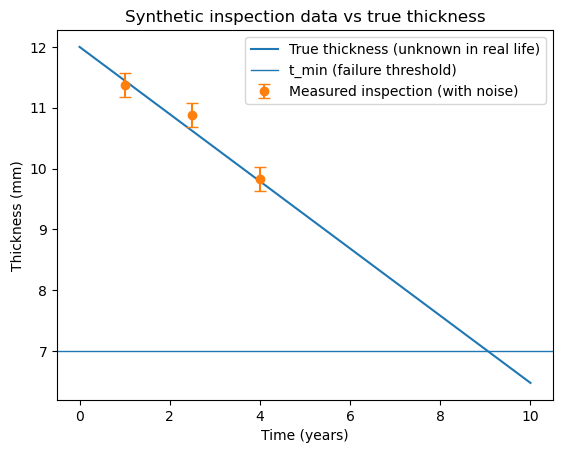

In [8]:
# buat garis ketebalan true dari 0 sampai horizon
time_line = np.linspace(0, horizon_years, 200)
thickness_line_true = t0 - r_true * time_line

plt.figure()
plt.plot(time_line, thickness_line_true, label="True thickness (unknown in real life)")
plt.errorbar(
    inspection_times_years, t_meas,
    yerr=meas_std,
    fmt="o", capsize=4,
    label="Measured inspection (with noise)"
)
plt.axhline(t_min, linewidth=1, label="t_min (failure threshold)")
plt.xlabel("Time (years)")
plt.ylabel("Thickness (mm)")
plt.title("Synthetic inspection data vs true thickness")
plt.legend()
plt.show()

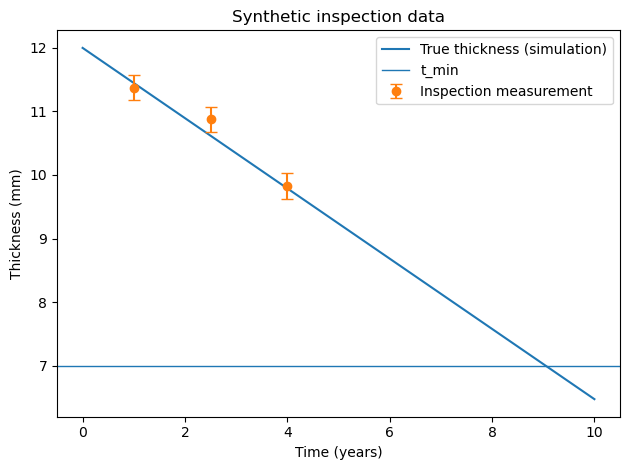

Saved figure to: C:\Users\LENOVO\Desktop\rbi-lite\figures


In [9]:
fig_dir = Path.home() / "Desktop" / "rbi-lite" / "figures"
fig_dir.mkdir(parents=True, exist_ok=True)

plt.figure()
plt.plot(time_line, thickness_line_true, label="True thickness (simulation)")
plt.errorbar(inspection_times_years, t_meas, yerr=meas_std, fmt="o", capsize=4, label="Inspection measurement")
plt.axhline(t_min, linewidth=1, label="t_min")
plt.xlabel("Time (years)")
plt.ylabel("Thickness (mm)")
plt.title("Synthetic inspection data")
plt.legend()
plt.tight_layout()
plt.savefig(fig_dir / "step3_inspection_vs_true.png", dpi=200)
plt.show()

print("Saved figure to:", fig_dir)